# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inputing the dataset and observing it

In [2]:
df=pd.read_csv("Dataset/flight_dataset.csv")

In [3]:
df.head(10)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,0,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1,8625,27,5,2019,11,25,19,15,7,50


In [4]:
df.shape

(10683, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Year            10683 non-null  int64 
 8   Dep_hours       10683 non-null  int64 
 9   Dep_min         10683 non-null  int64 
 10  Arrival_hours   10683 non-null  int64 
 11  Arrival_min     10683 non-null  int64 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_min    10683 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,2019.0,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,0.0,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [7]:
list(df.columns)

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Price',
 'Date',
 'Month',
 'Year',
 'Dep_hours',
 'Dep_min',
 'Arrival_hours',
 'Arrival_min',
 'Duration_hours',
 'Duration_min']

## Checking for null value

In [8]:
df.isnull().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Price             0
Date              0
Month             0
Year              0
Dep_hours         0
Dep_min           0
Arrival_hours     0
Arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

### Since there is no null value, no need for removing/ replacing it

## Finding the total duration in minutes

In [9]:
df["Duration"] = df["Duration_hours"] * 60 + df["Duration_min"]
df.drop(["Duration_hours", "Duration_min"], axis = 1, inplace = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285


In [10]:
df['Year'].value_counts()

2019    10683
Name: Year, dtype: int64

### Removing Year column as it is for a single year

In [11]:
df.drop(columns=['Year'],axis=1,inplace=True)

## Observing the counts of each vale in a column

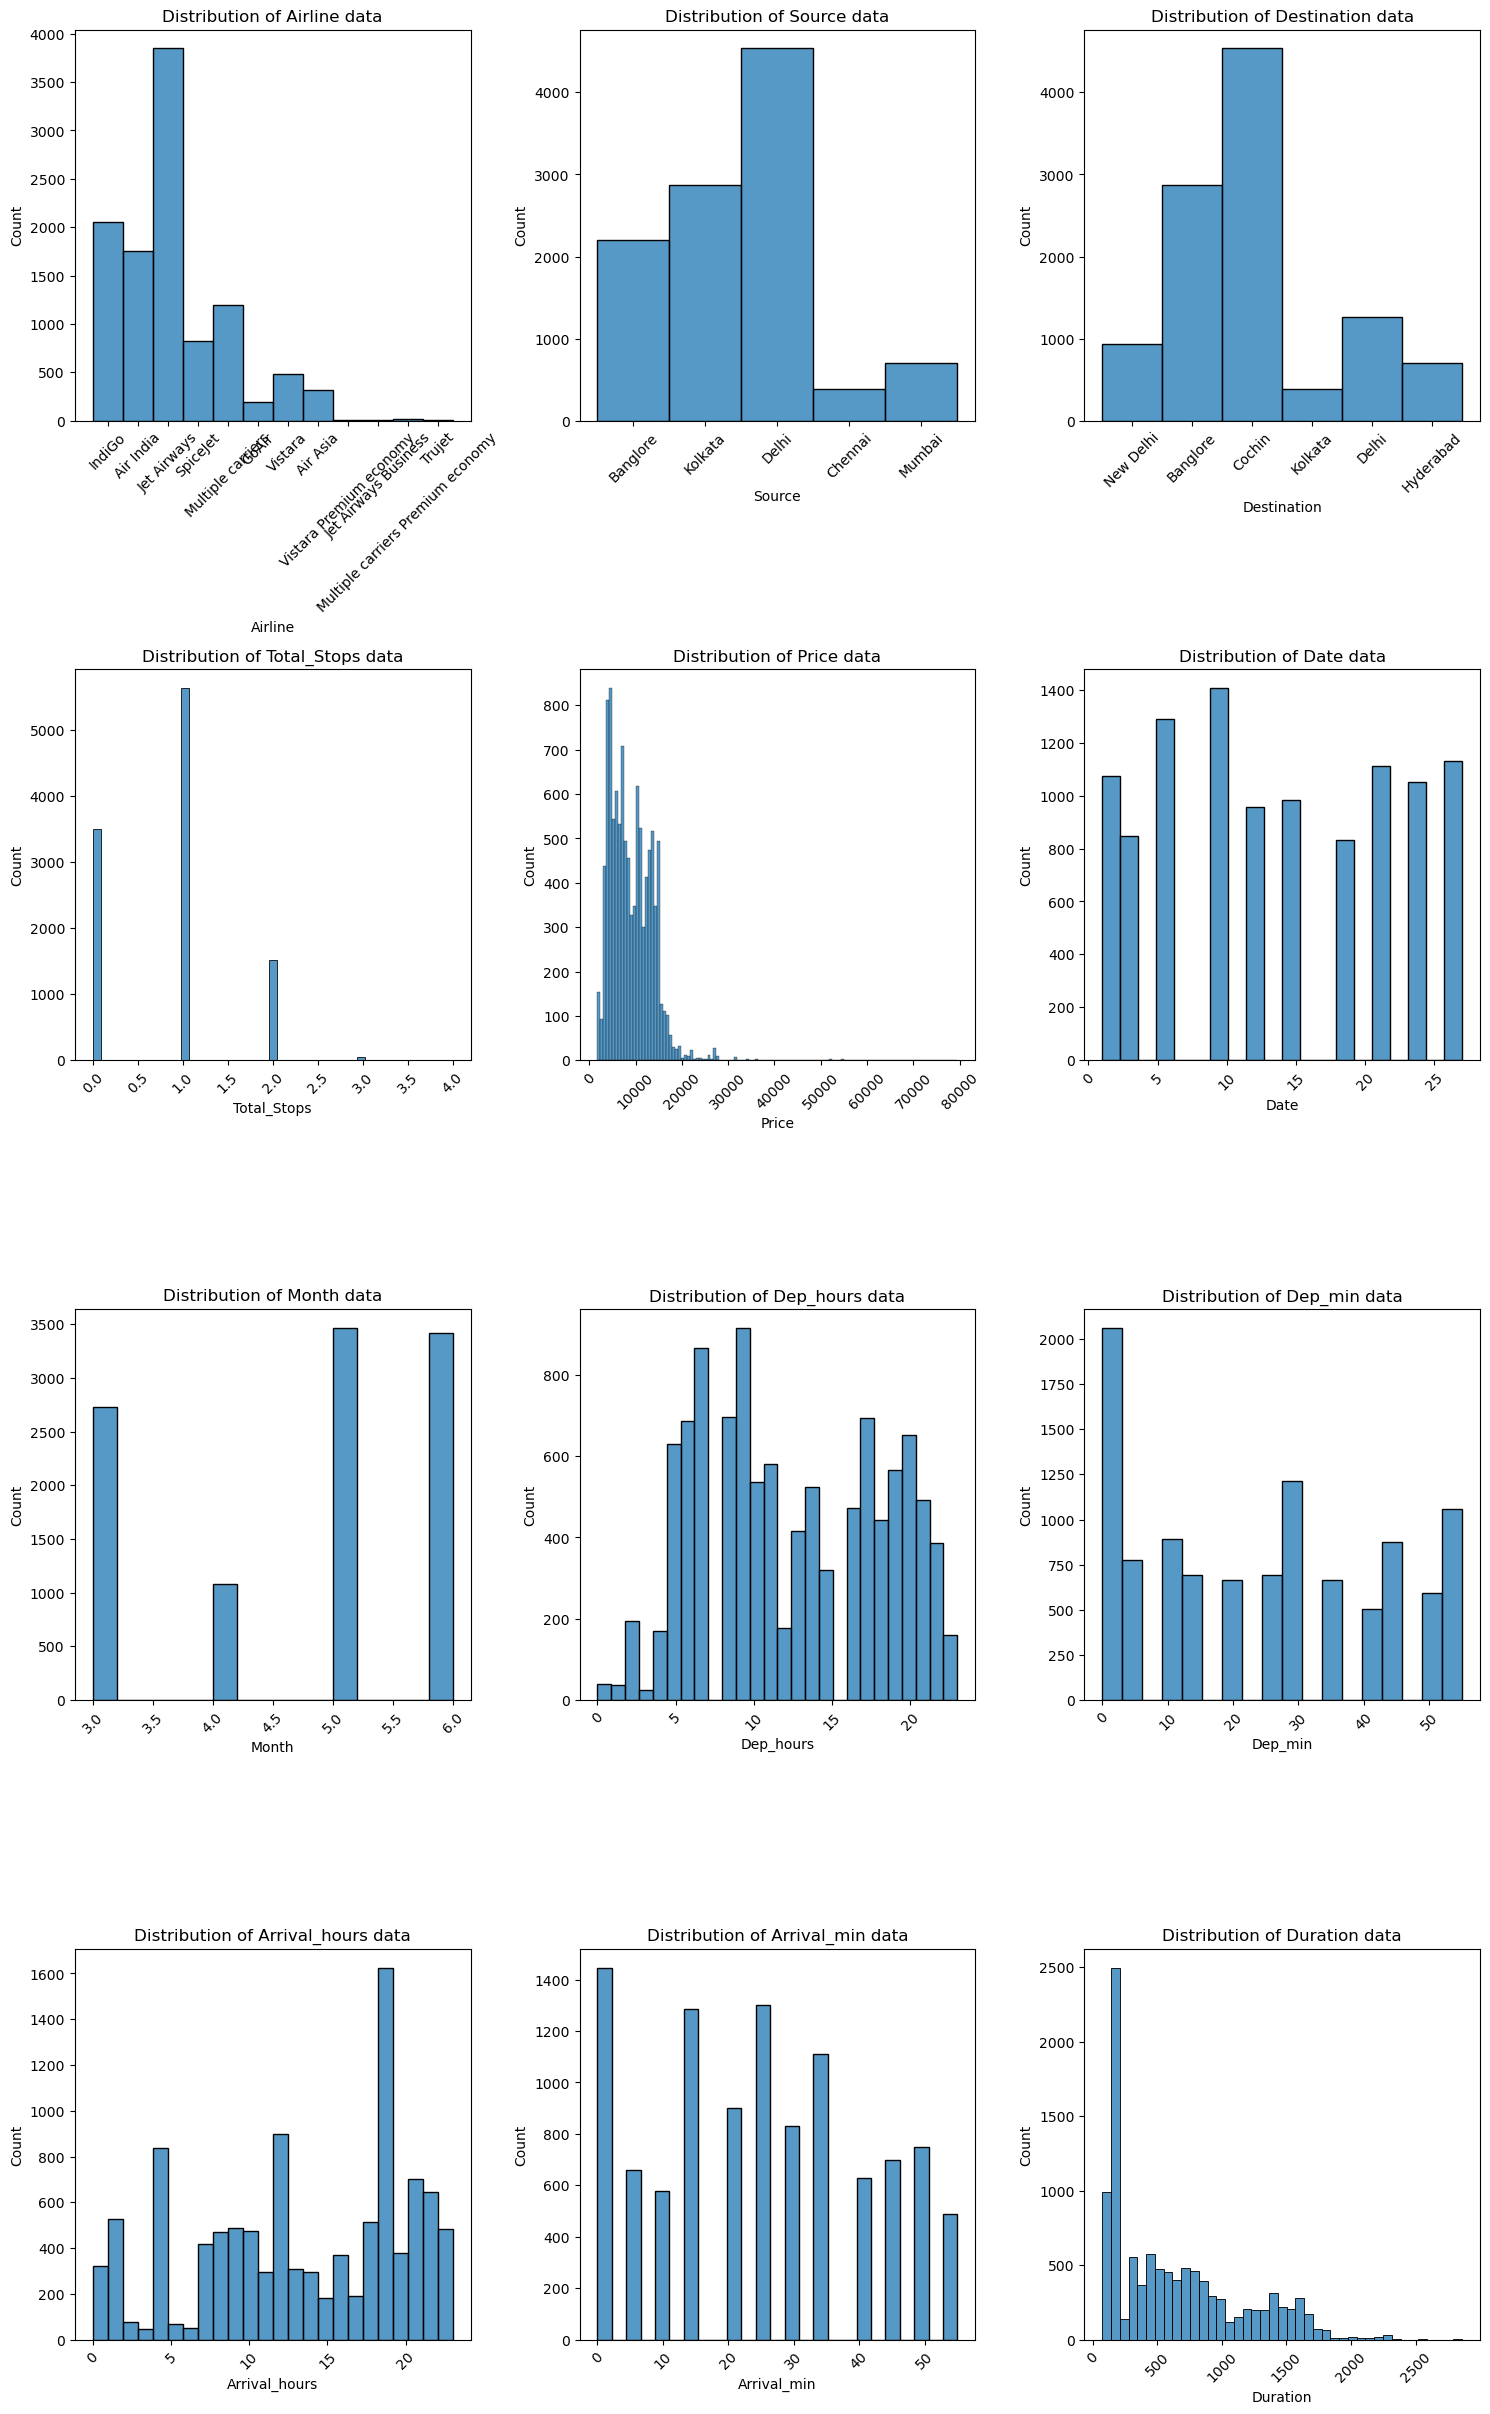

In [12]:
# Calculate number of rows and columns for subplot grid
num_cols = 2  # Number of columns in subplot layout
num_rows = (len(df.columns) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))
for i, col in enumerate(df.columns[:], 1):
    plt.subplot(5, 3, i)
    sns.histplot(x = df[col])
    plt.title(f"Distribution of {col} data")
    plt.tight_layout()
    plt.xticks(rotation = 45)
    plt.plot()

## Separating the numerical and categorical columns for encoding

In [13]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [14]:
numerical_columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Dep_hours', 'Dep_min',
       'Arrival_hours', 'Arrival_min', 'Duration'],
      dtype='object')

In [15]:
categorical_columns

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [16]:
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro, normaltest, kstest
from statsmodels.stats.diagnostic import lilliefors #corrected import

## Normality Tests

In [17]:
#function to perform normality tests
def test_normality(df,cols):
    print(f'Columns:{col}')
    
    #shapiro-Wilk test
    stat_shapiro, p_shapiro=shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistic={stat_shapiro:.3f},p-value={p_shapiro:.3f}')
    if p_shapiro>0.05:
        print(f'Shapiro-Wilk Test:{col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test:{col} doesnt look normally distributed ( reject H0)')
    
    #Anderson-Durling Test
    result_anderson=anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values:{result_anderson.critical_values}')
    if result_anderson.statistic<result_anderson.critical_values[2]:
        print(f'Anderson_Darling Test:{col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Anderson_Darling Test:{col} doesnt look normally distributed (reject H0)')
    
    #Jurque-Deru Lesc
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f} ')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0) ')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

    # D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print (f"D'Agostino and Pearson's Test: Statistics-{stat_agostino:.3f}, p-value={p_agostino:.3f}") 
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks: 3f}')

    if p_ks > 0.05:
        print(f"Kolmogorov-Smirnov Test: {col} looks normally disributed (fail to reject H0)")
    else:
        print(f"Kolmogorov-Smirnov Test: {col} does not look normally disributed (reject H0)")

    # lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f"Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}")
    if p_lilliefors > 0.05:
        print(f"Lilliefors Test: {col} looks normally disributed (fail to reject H0)")
    else:
        print(f"Lilliefors Test: {col} does not look normally disributed (reject H0)")

    print("\n")

#Perform normality tests for each numerical columns
for col in numerical_columns:
    test_normality(df,col)
    

Columns:Total_Stops
Shapiro-Wilk Test: Statistic=0.798,p-value=0.000
Shapiro-Wilk Test:Total_Stops doesnt look normally distributed ( reject H0)
Anderson-Darling Test: Statistics=983.257
Anderson-Darling Test: Critical Values:[0.576 0.656 0.787 0.918 1.092]
Anderson_Darling Test:Total_Stops doesnt look normally distributed (reject H0)
Jarque-Bera Test: JB statistic=274.388, p-value=0.000 
Jarque-Bera Test: Total_Stops does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics-336.362, p-value=0.000
D'Agostino and Pearson's Test: Total_Stops does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=0.515, p-value= 0.000000
Kolmogorov-Smirnov Test: Total_Stops does not look normally disributed (reject H0)
Lilliefors Test: Statistics=0.276, p-value=0.001
Lilliefors Test: Total_Stops does not look normally disributed (reject H0)


Columns:Price
Shapiro-Wilk Test: Statistic=0.896,p-value=0.000
Shapiro-Wilk Test:Price doesnt look norma

/Users/mandipshrestha/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Checking for outliers
### Won't remove it for better accuracy

In [18]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    
    for col in data.columns:
        if col in numerical_columns: #process only numerical columns
            Q1=data[col].quantile(0.25)
            Q3=data[col].quantile(0.75)
            IQR=Q3-Q1
            lower_bound=Q1-1.5*IQR
            upper_bound=Q3+1.5*IQR
            col_outliers_mask=(data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #True if any outliers detected
    
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method")
for col, is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method
Airline:True
Source:True
Destination:True
Total_Stops:True
Price:True
Date:False
Month:False
Dep_hours:False
Dep_min:False
Arrival_hours:False
Arrival_min:False
Duration:True


In [19]:
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")


Outliers detected using Z-score method:
Airline: True
Source: True
Destination: True
Total_Stops: True
Price: True
Date: False
Month: False
Dep_hours: False
Dep_min: False
Arrival_hours: False
Arrival_min: False
Duration: True


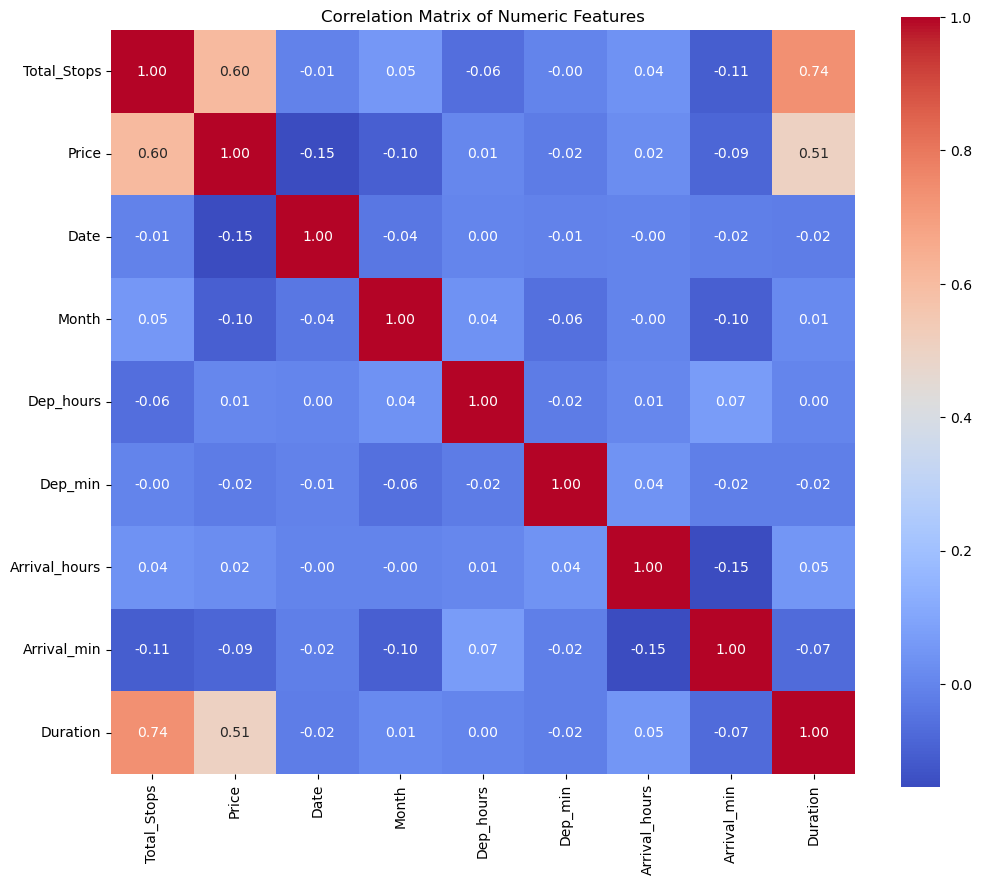

In [20]:
numeric_data=df[numerical_columns]

#compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

#Plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:
import scipy.stats as stats

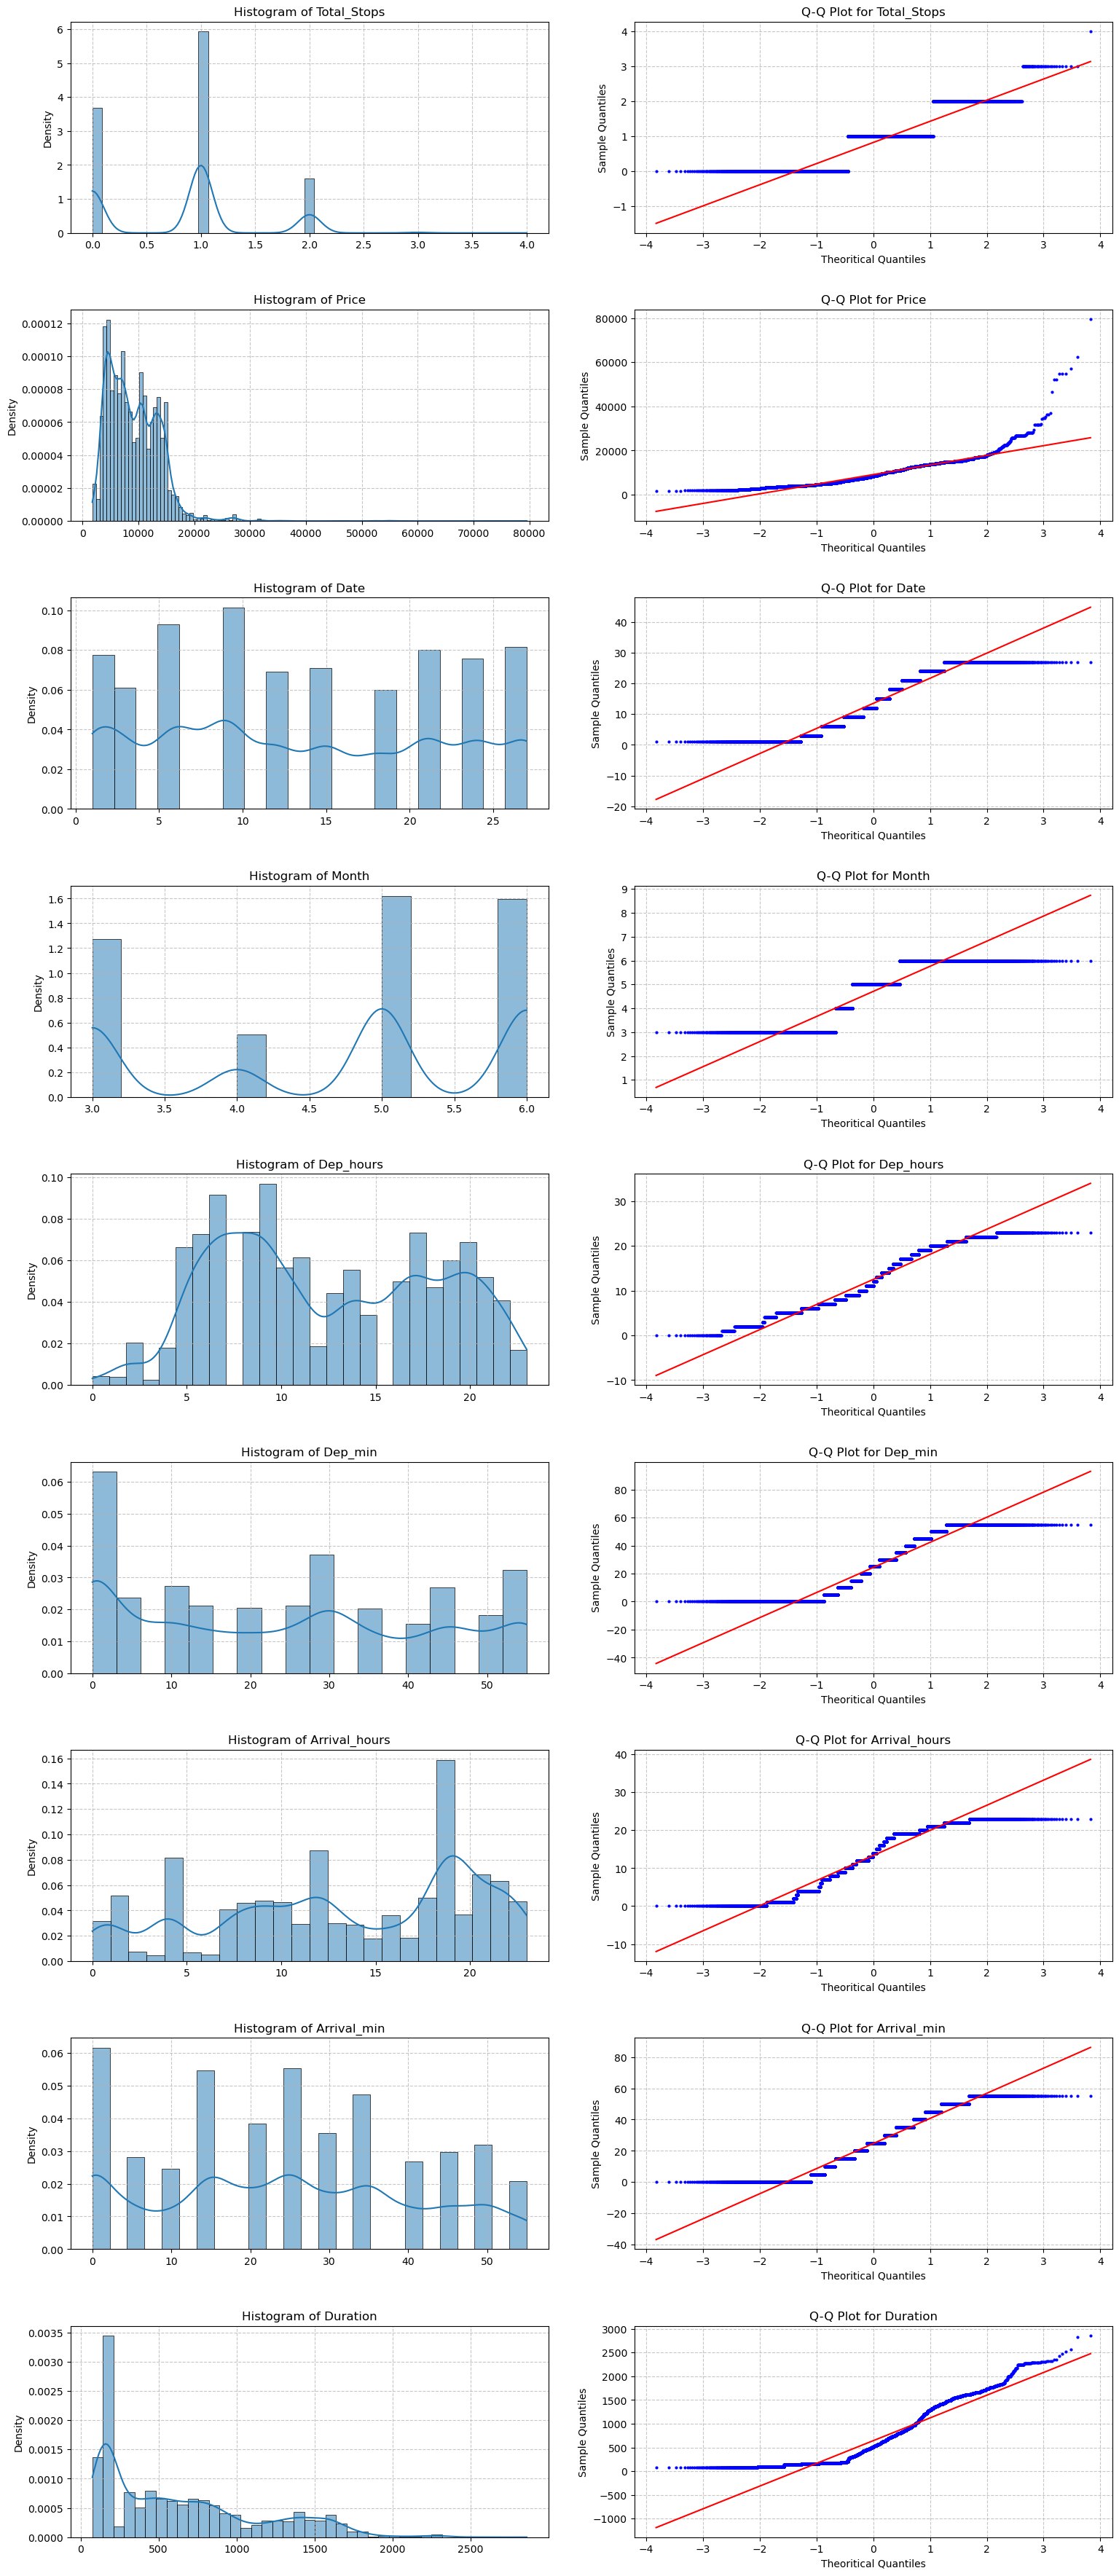

In [22]:
#create a figure and axes for subplots
num_cols=len(numerical_columns)
fig, axes=plt.subplots(num_cols,2,figsize=(16, num_cols*4))

#plotting histograms and Q-Q plots for each numerical columns
for i, col in enumerate(numerical_columns):
    #histogram on the left subplot
    sns.histplot(df[col],kde=True, ax=axes[i,0],stat='density',linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(' ')
    axes[i,0].set_ylabel('Density')
    axes[i,0].grid(True, linestyle='--', alpha=0.7)
    
    #Q-Q plot on the right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0)
    #adjust marker size for clarity
    axes[i,1].grid(True, linestyle='--', alpha=0.7)
    axes[i,1].set_title(f'Q-Q Plot for {col}')
    axes[i,1].set_xlabel('Theoritical Quantiles')
    axes[i,1].set_ylabel('Sample Quantiles')
    
#adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

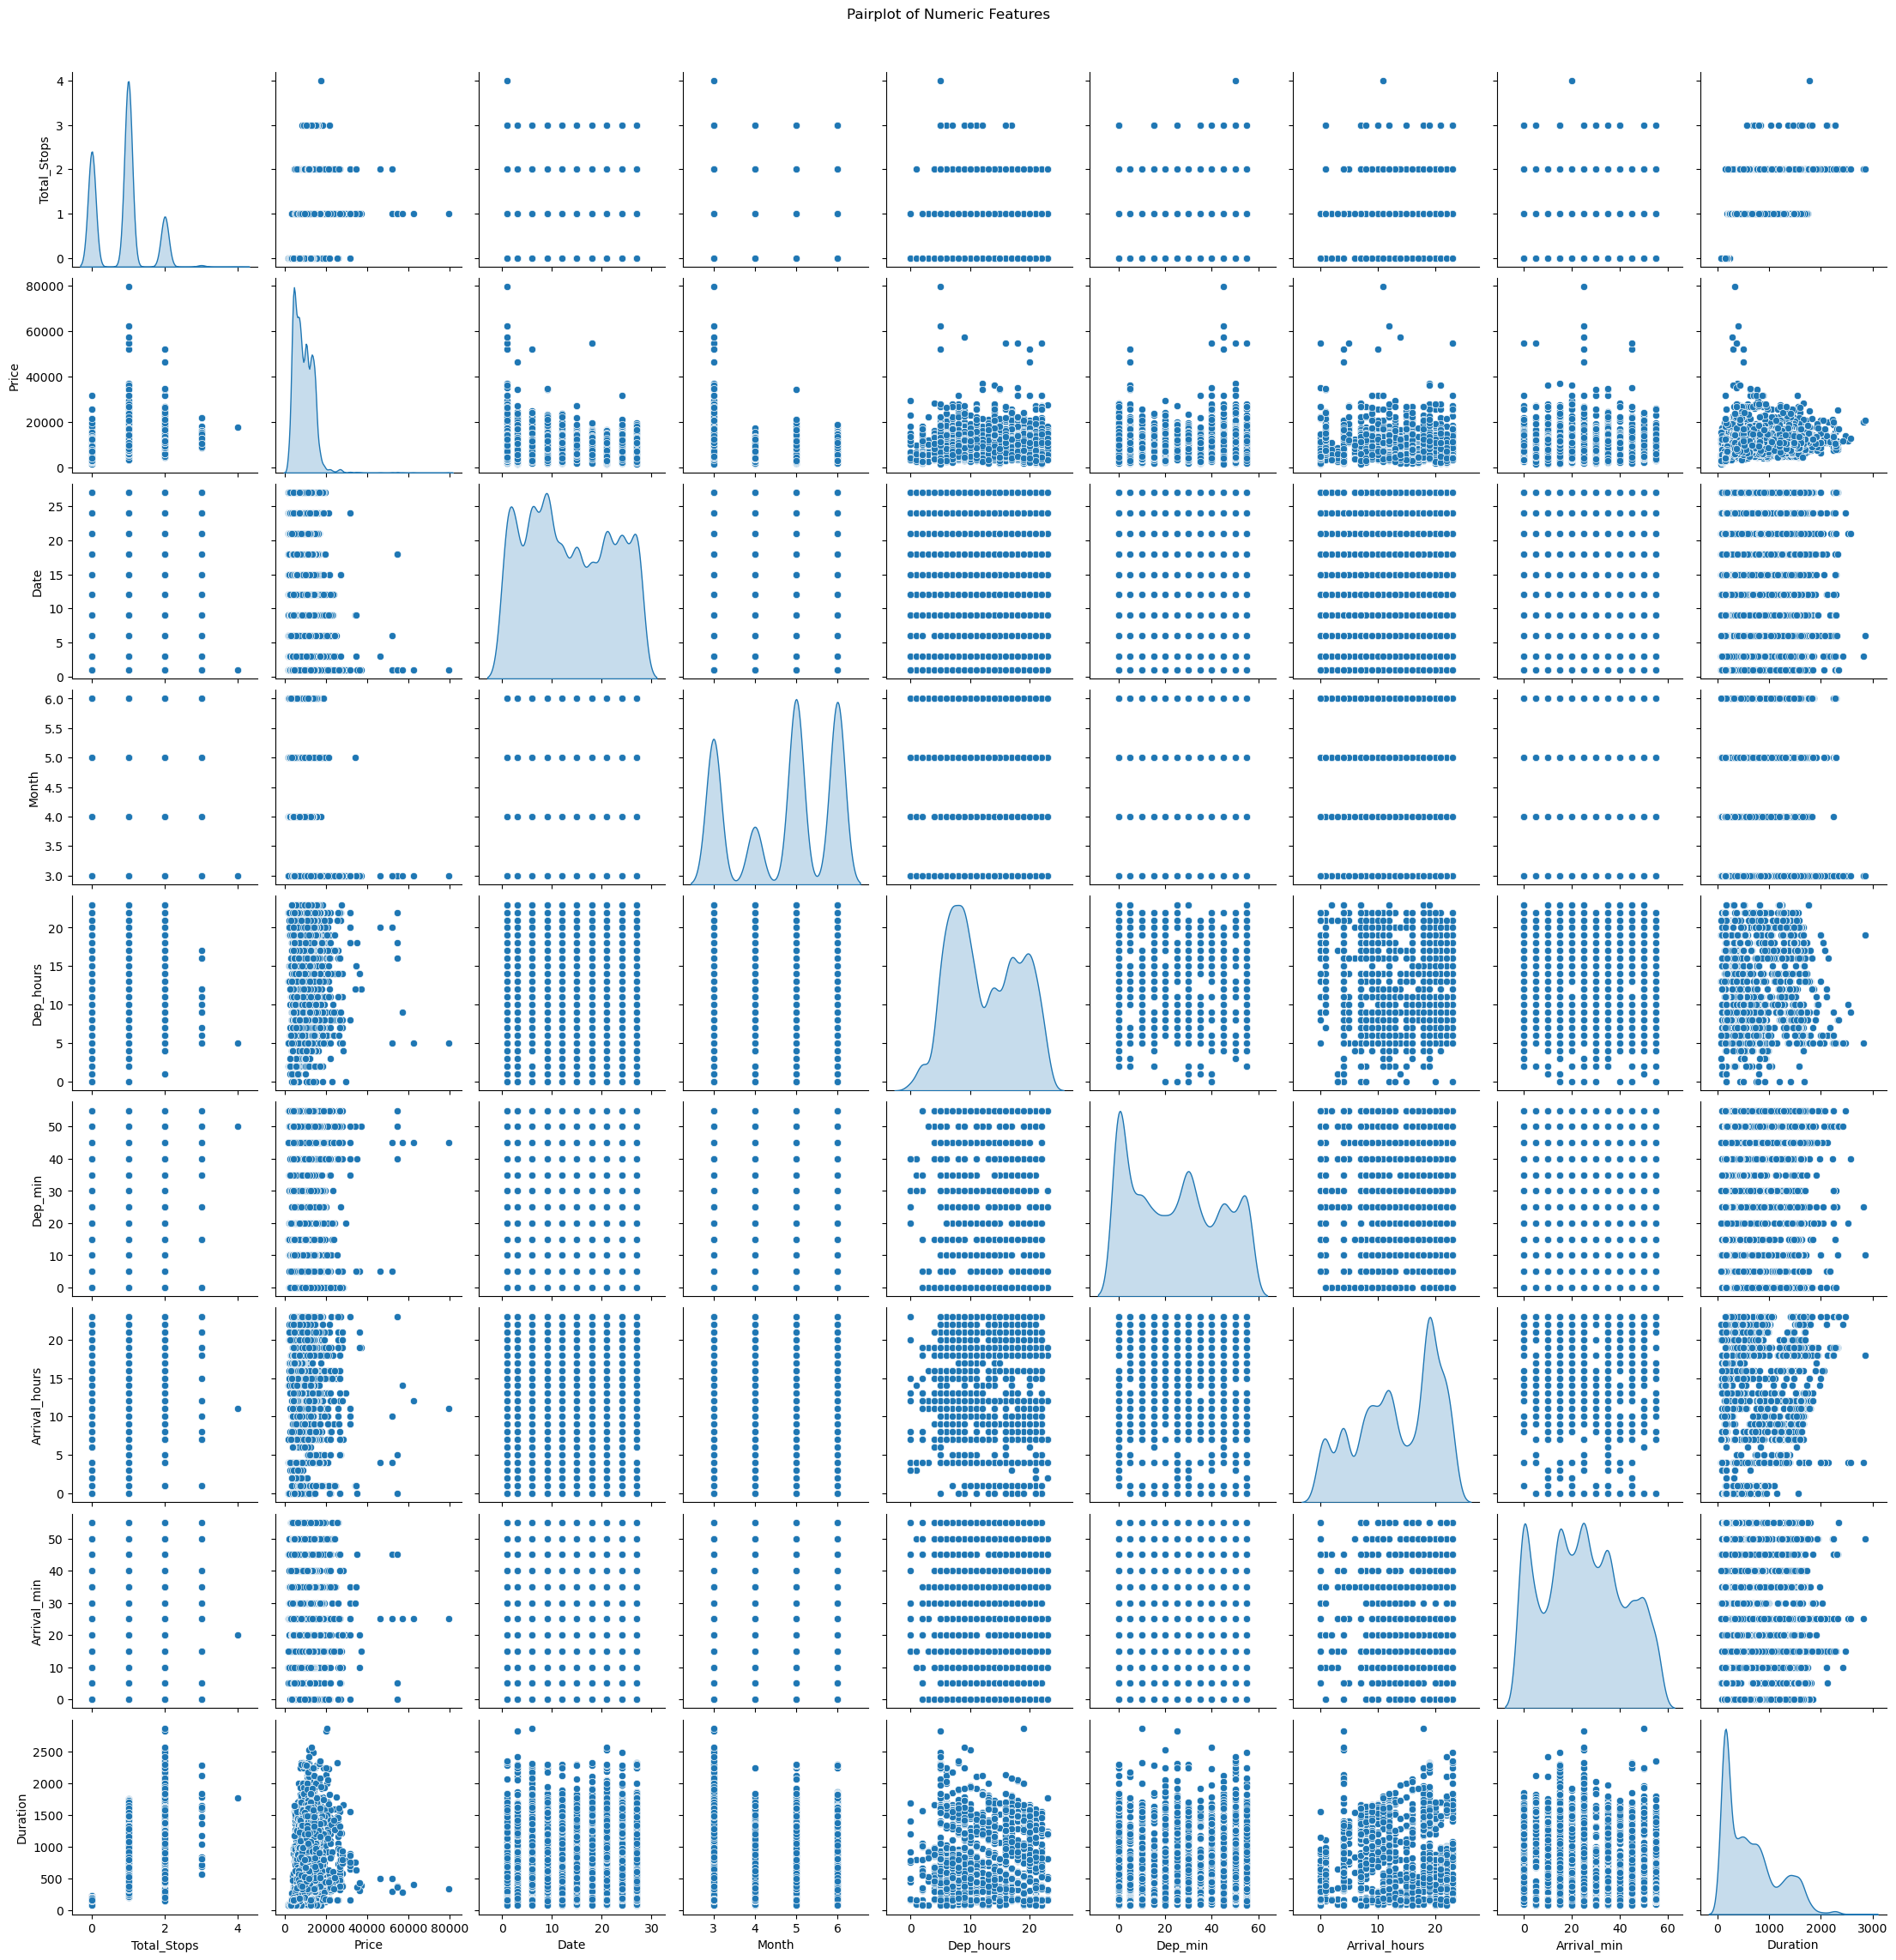

In [23]:
#pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [24]:
#Drop numerical columns from data
data_categorical=df.drop(columns=numerical_columns)

#Perform one-hot encoding on categorical columns
encoded_data=pd.get_dummies(data_categorical,columns=['Airline', 'Source', 'Destination'])

In [25]:
encoded_data.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

In [27]:
#Assuming encoded data is already created from one hot encoding
#numerical_cols should be defined earlier as numercial columns from your data

# Save scaler for price
price_scaler = StandardScaler()
price_scaler.fit(df[['Price']])
joblib.dump(price_scaler, 'ML_MODEL/price_scaler.pkl')


#pipeline for numerical columns
numerical_pipeline=Pipeline([
    ('scalar',StandardScaler())
])

#Transform numerical columns
numerical_data=numerical_pipeline.fit_transform(df[numerical_columns])

#convert transformed numerical data back to Dataframe
numerical_data_df=pd.DataFrame(numerical_data,columns=numerical_columns)

#combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)

#Now final_data contains all your processed data ready for modeling
final_data.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_New Delhi,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration
0,0,0,0,1,0,0,0,0,0,0,...,1,-1.220744,-1.125548,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931686
1,0,1,0,0,0,0,0,0,0,0,...,0,1.741483,-0.309048,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390146
2,0,0,0,0,1,0,0,0,0,0,...,0,1.741483,1.039858,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.978472
3,0,0,0,1,0,0,0,0,0,0,...,0,0.260370,-0.622202,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.626455
4,0,0,0,1,0,0,0,0,0,0,...,1,0.260370,0.914076,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.705224


In [28]:
df_0 = df[df["Total_Stops"] == 0]
df_1 = df[df["Total_Stops"] == 1]
df_2 = df[df["Total_Stops"] == 2]

In [29]:
print("Mean Price in zero transfer :", df_0["Price"].mean(), ", Mean flight time in zero transfer :", df_0["Duration"].mean())
print("Mean Price in one transfer :", df_1["Price"].mean(), ", Mean flight time in one transfer :", df_1["Duration"].mean())
print("Mean Price in two transfer :", df_2["Price"].mean(), ", Mean flight time in two transfer :", df_2["Duration"].mean())

Mean Price in zero transfer : 5024.900315095961 , Mean flight time in zero transfer : 150.08450300773418
Mean Price in one transfer : 10593.570031994312 , Mean flight time in one transfer : 782.0538570920726
Mean Price in two transfer : 12715.807894736841 , Mean flight time in two transfer : 1233.733552631579


## Model train test

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import os
import joblib #for saving the model

In [31]:
#extract features(X) and target variable(Y)
X=final_data.drop('Price',axis=1)
y=final_data['Price']

#split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)
X_train.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops', 'Date', 'Month', 'Dep_hours',
       'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration'],
      dtype='object')

In [32]:
# Normalization of X_train & X_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [34]:
#Linear Regression Model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
print('train_mse',mean_squared_error(y_train,lr_model.predict(X_train)),'\ntest_mse',mean_squared_error(y_test,lr_model.predict(X_test)))
print('train_r-sq:', r2_score(y_train, lr_model.predict(X_train)), 
      '\ntest_r-sq:', r2_score(y_test, lr_model.predict(X_test)))
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/linear_regression.pkl'
joblib.dump(lr_model, model_path)
print(f'Model saved at {model_path}')

train_mse 0.37475579046270774 
test_mse 5.356033308040418e+18
train_r-sq: 0.6229330074695009 
test_r-sq: -5.228935395177606e+18
Model saved at ML_MODEL/linear_regression.pkl


In [35]:
#Random Forest Regressor Model
rfm_model=RandomForestRegressor(n_estimators=3,random_state=69, min_samples_split=2)
rfm_model.fit(X_train,y_train)
print('train_mse',mean_squared_error(y_train,rfm_model.predict(X_train)),
      '\ntest_mse',mean_squared_error(y_test,rfm_model.predict(X_test)))
print('train_r-sq:', r2_score(y_train, rfm_model.predict(X_train)), 
      '\ntest_r-sq:', r2_score(y_test, rfm_model.predict(X_test)))
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_regression.pkl'
joblib.dump(rfm_model, model_path)
print(f'Model saved at {model_path}')

train_mse 0.07228670440024004 
test_mse 0.23421591276356774
train_r-sq: 0.9272674874630067 
test_r-sq: 0.7713419977197036
Model saved at ML_MODEL/random_forest_regression.pkl


In [36]:
# Predicting and reversing transformation for Random Forest model
rfm_predictions_scaled = rfm_model.predict(X_test)
rfm_predictions = price_scaler.inverse_transform(rfm_predictions_scaled.reshape(-1, 1))
print("Random Forest Predictions (Inverse Transformed):", rfm_predictions[:10])

# Predicting and reversing transformation for Linear Regression model
lr_predictions_scaled = lr_model.predict(X_test)
lr_predictions = price_scaler.inverse_transform(lr_predictions_scaled.reshape(-1, 1))
print("Linear Regression Predictions (Inverse Transformed):", lr_predictions[:10])

Random Forest Predictions (Inverse Transformed): [[ 5709.33333333]
 [13101.        ]
 [10368.33333333]
 [ 9663.        ]
 [12681.        ]
 [ 5857.33333333]
 [25735.        ]
 [ 4581.66666667]
 [ 4547.        ]
 [12284.        ]]
Linear Regression Predictions (Inverse Transformed): [[ 7759.77842963]
 [13227.59843948]
 [10207.20783636]
 [12389.1433766 ]
 [12865.84981793]
 [ 8627.46422597]
 [15113.1095242 ]
 [ 6212.86424879]
 [ 6023.57774295]
 [13441.35521687]]


### As we can see that random forest has less error, we will be using this for predicting the price.